In [23]:
import pandas as pd

df = pd.read_csv("clean_train.csv")
df.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_encoded,Embarked_encoded,Age_categorized
0,0,0,3,male,22.0,1,0,7.2500,S,1,2,2
1,1,1,1,female,38.0,1,0,71.2833,C,0,0,2
2,2,1,3,female,26.0,0,0,7.9250,S,0,2,2
3,3,1,1,female,35.0,1,0,53.1000,S,0,2,2
4,4,0,3,male,35.0,0,0,8.0500,S,1,2,2


In [28]:
df1 = df[["Pclass", "SibSp", "Parch", "Sex_encoded", "Embarked_encoded", "Age_categorized", "Survived"]]

# Correlation using heatmap

In [25]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 10)})

<AxesSubplot:>

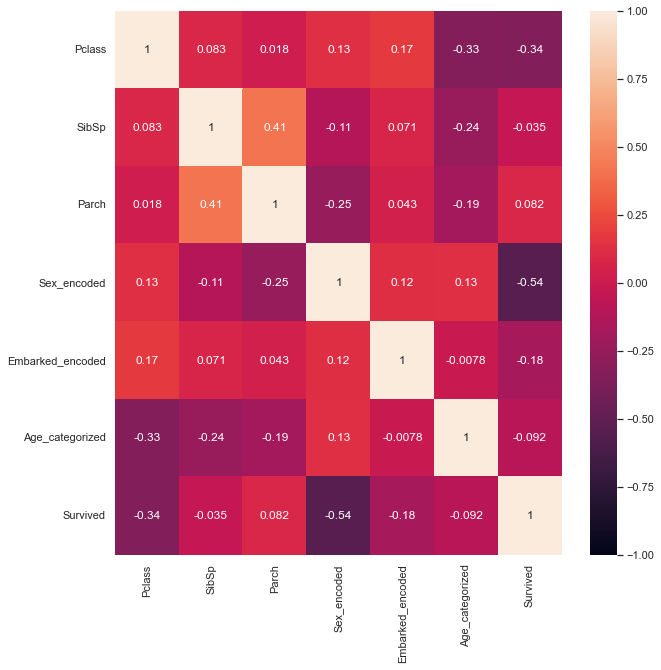

In [29]:
sns.heatmap(df1.corr(), annot=True, vmin=-1, vmax=1)

## Observations:

- ``Survival`` is moderately correlated to ``PClass``, ``Sex_encoded`` and slightly correlated to ``Embarked_encoded``. Surprisingly ``Age_categorized`` is not correlated to ``Survival`` at all.
- ``Age_encoded`` has some correlation with ``PClass`` and slight correlation with ``SibSp`` and ``Parch``.
- ``Sex_encoded`` has moderate correlation with ``Parch``.
- ``Parch`` has moderate correlation with ``SibSp``.